# Setup:
!conda install pyspark openjdk scikit-learn pandas

In [6]:
import sys
import os

sys.path.append(os.path.realpath('..'))
os.environ['PYTHONPATH'] = os.path.realpath('..')

import pandas as pd
import numpy as np
%matplotlib inline

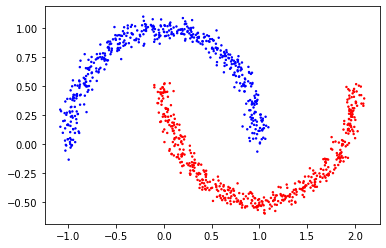

In [7]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=.05)

x = pd.DataFrame(x, columns=list('ab'))

import matplotlib.pyplot as plt

plt.scatter(x.a, x.b, s=2, c=y, cmap='bwr');

In [3]:
from pyspark.sql import SparkSession

ss = SparkSession.builder.master('local').config(
    'spark.executor.instances', '1'
).getOrCreate()

ss.sparkContext

<SparkContext master=local appName=pyspark-shell>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

f_t, f_v, t_t, t_v = train_test_split(x, y, test_size=0.5)

m = RandomForestClassifier(n_estimators=10, oob_score=True).fit(f_t, t_t)
m.oob_score_


0.974

In [5]:
df = ss.createDataFrame(f_v)

from sparktools.core import score

score_df = score(sc=ss.sparkContext, sdf=df, model=m).cache()

scores = score_df.toPandas()

scores.head()


,label,target_proba
0,positive,0.0
1,positive,0.0
2,positive,0.9
3,positive,0.0
4,positive,0.9


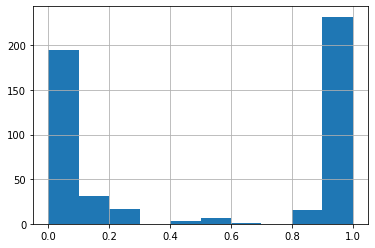

In [7]:
scores.target_proba.hist();